In [1]:
# Loading and visualizing the dataset
import pandas as pd
df = pd.read_csv("C:/Users/Ashim/Downloads/glass.csv")
df.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [4]:
df.duplicated().sum()

1

In [5]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


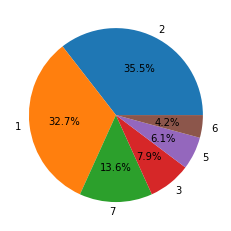

In [6]:
import matplotlib.pyplot as plt
plt.pie(df.value_counts("Type"), labels=df.value_counts("Type").index, autopct
='%1.1f%%')
plt.show()


In [7]:
df_2 = df.copy()
df_2 = df_2.drop_duplicates()
df_2

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [8]:
df_2.groupby(["Type"]).mean()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Type,,,,,,,,,
1,1.518669,13.228261,3.548551,1.173913,72.631449,0.452319,8.786087,0.012899,0.057826
2,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
3,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
5,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
6,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
7,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


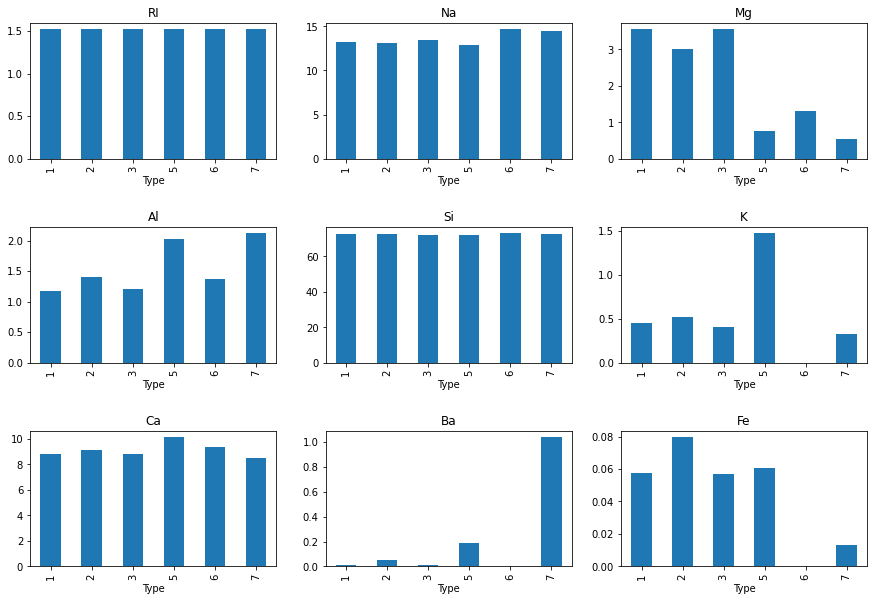

In [10]:
grouped = df_2.groupby(["Type"])
mean_group = grouped.mean()
# Create subplots
colors = {'1':'red', '2':'green', '3':'blue', '5':'pink', "6": "yellow", "7":
"orange"}
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
# Iterate through the columns of mean_group and make a bar plot for each column
for i, column in enumerate(mean_group):
 mean_group[column].plot(ax=axes[i//3, i%3], kind='bar')
 axes[i//3, i%3].set_title(column)
plt.subplots_adjust(hspace=0.5)
plt.show()


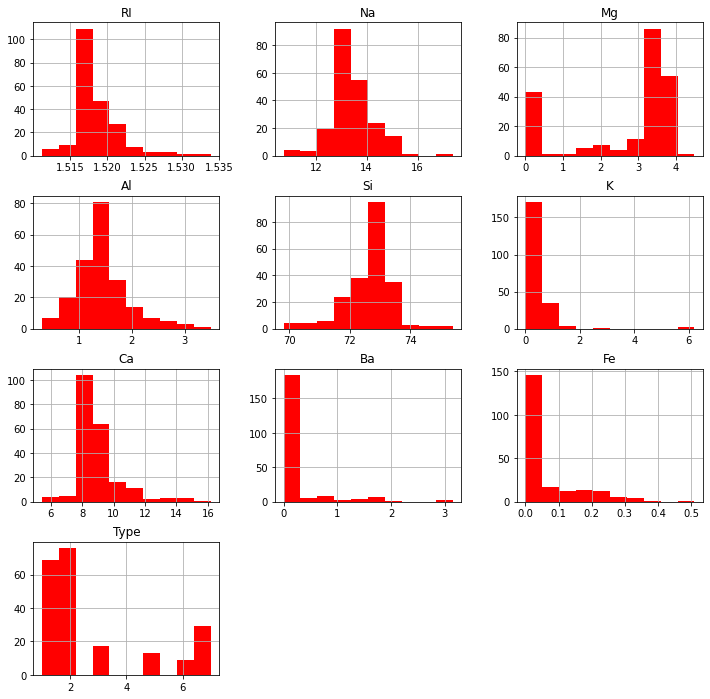

In [11]:
df_2.hist(figsize=(12,12), color='red')
plt.show()


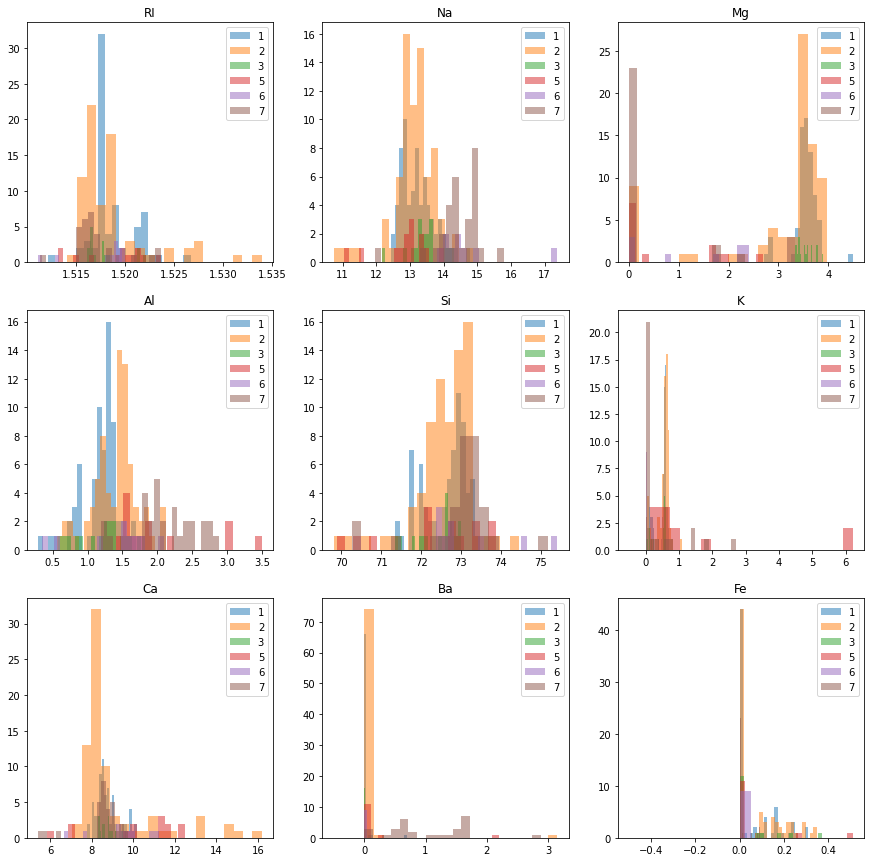

In [15]:
classes = df_2['Type'].unique()
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.ravel()
numericals = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
for i, feature in enumerate(numericals):
 # Get the data for the current feature
    feature_data = df_2[feature]
 # Iterate over each class
    for j, class_ in enumerate(classes):
 # Get the data for the current class
     class_data = feature_data[df_2["Type"] == class_]
 # Plot the histogram for the class data on the corresponding subplot
     axs[i].hist(class_data, bins=20, color=f'C{j}', alpha=0.5, label=class_)
    axs[i].set_title(feature)
    axs[i].legend()
plt.show()

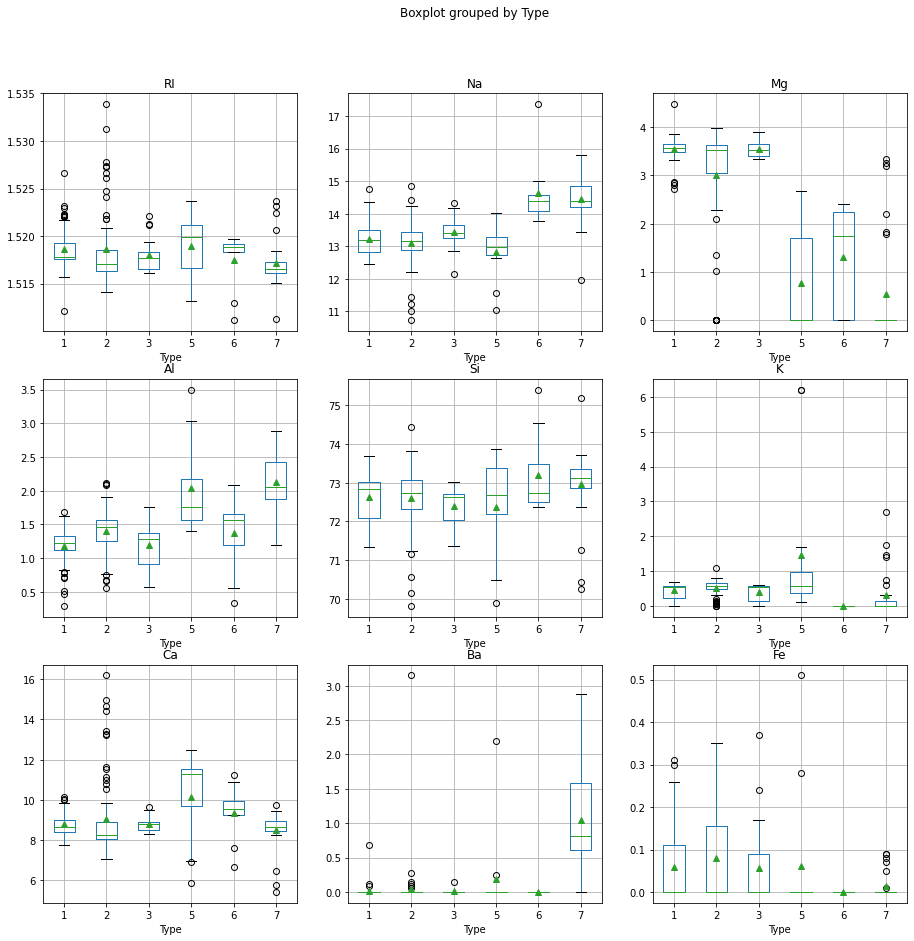

In [16]:
import warnings
warnings.filterwarnings('ignore')
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.ravel()
for i, feature in enumerate(numericals):
 # Get the data for the current feature
    feature_data = df_2[[feature,"Type"]]
 # Plot the boxplot for the feature data on the corresponding subplot
    feature_data.boxplot(by="Type", ax=axs[i], positions=[j+1 for j in range(len(classes))], widths=0.5, showmeans=True)
    axs[i].set_title(feature)
    axs[i].set_xlabel("Type")

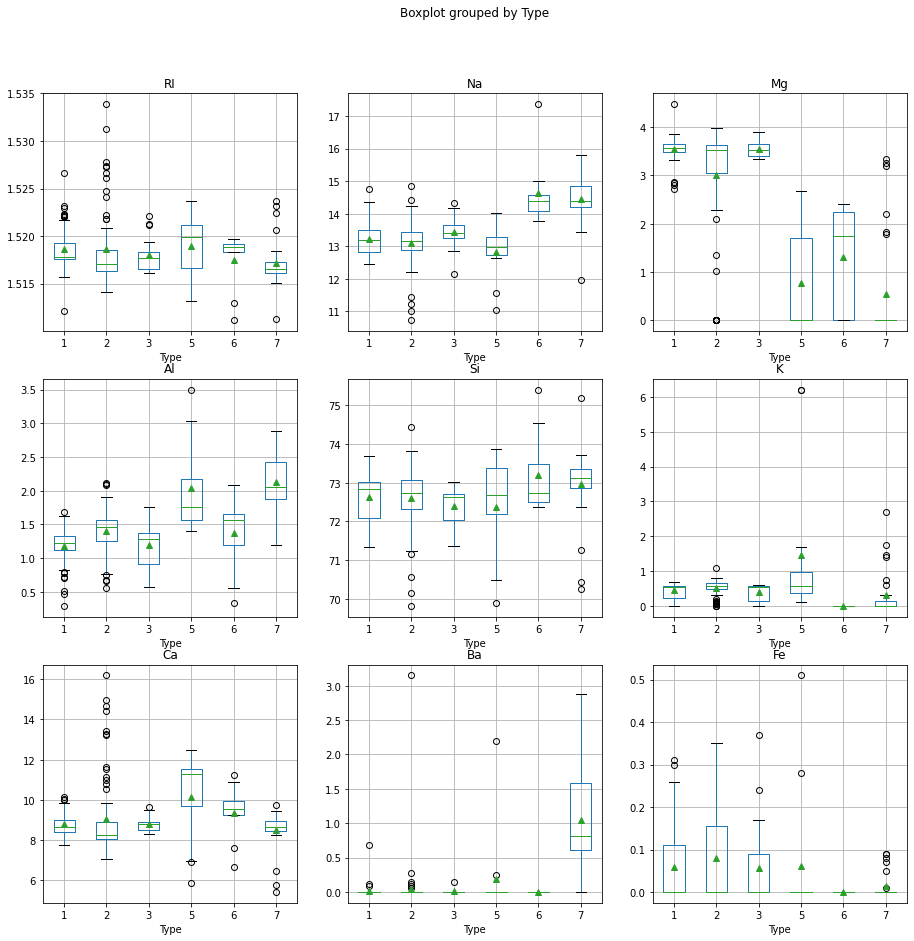

In [22]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.ravel()
for i, feature in enumerate(numericals):
 # Get the data for the current feature
 feature_data = df_2[[feature,"Type"]]
 # Plot the boxplot for the feature data on the corresponding subplot
 feature_data.boxplot(by="Type", ax=axs[i], positions=[j+1 for j in range(len(classes))], widths=0.5, showmeans=True)
 axs[i].set_title(feature)
 axs[i].set_xlabel("Type")

<AxesSubplot:>

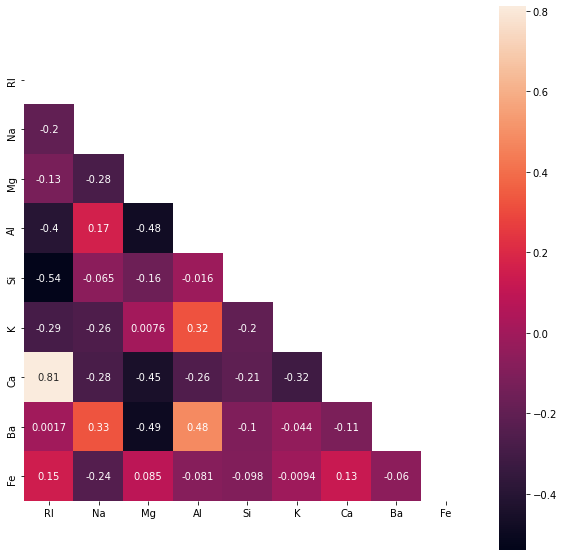

In [24]:
import numpy as np
import seaborn as sns
df_numerical = df_2.drop(columns = ["Type"])
correlation = df_numerical.corr()
upper_triangle = np.triu(correlation)
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data=correlation,mask=upper_triangle,square=True,annot=True)

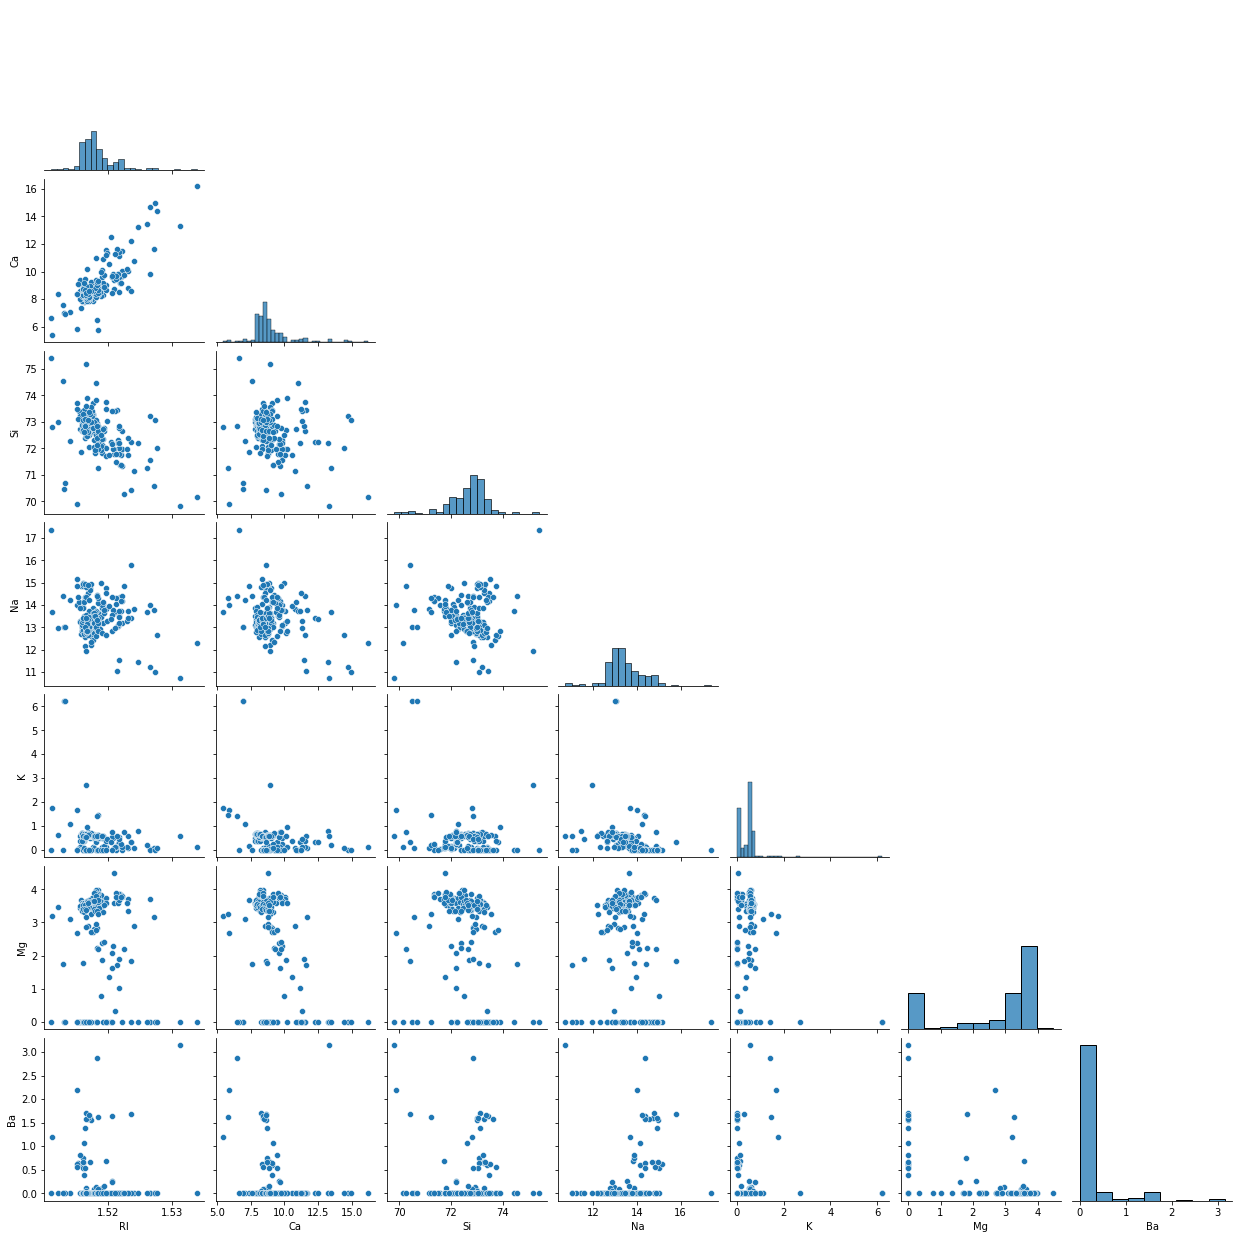

In [25]:
sns.pairplot(df_2[['RI','Ca','Si',"Na", "K", "Mg", "Ba"]], corner=True)


## Building the Model


In [26]:
from sklearn.model_selection import train_test_split
X = df_2.drop(['Type'], axis=1)
y = df_2['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


In [27]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

In [29]:
from sklearn.model_selection import cross_validate
cv_result = cross_validate(knn, X_train, y_train, cv=10)
cv_result


{'fit_time': array([0.03700042, 0.00200367, 0.00199938, 0.00198865, 0.00099993,
        0.0020051 , 0.00199842, 0.00200605, 0.00201392, 0.00199676]),
 'score_time': array([0.09702921, 0.00199795, 0.00200772, 0.00100017, 0.00200462,
        0.00299311, 0.00299954, 0.00199676, 0.00298595, 0.00100088]),
 'test_score': array([0.53333333, 0.53333333, 0.5       , 0.78571429, 0.71428571,
        0.57142857, 0.64285714, 0.57142857, 0.64285714, 0.64285714])}

In [30]:
scores = cv_result["test_score"]
print("The mean accuracy using cross validation is: "
 f"{scores.mean():.3f} ± {scores.std():.3f}"
)


The mean accuracy using cross validation is: 0.614 ± 0.085


 - Hyperparameter Tuning

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {
 "n_neighbors": [3, 5, 7, 9],
 "weights": ["uniform", "distance"],

}
model_grid_search = GridSearchCV(
 knn, param_grid=param_grid, n_jobs=2, cv=10
)
model_grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=2,
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [32]:
cv_results = pd.DataFrame(model_grid_search.cv_results_)
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001292,0.000459,0.001498,0.000495,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.533333,0.533333,0.500000,0.785714,0.714286,0.571429,0.642857,0.571429,0.642857,0.642857,0.613810,0.084662,7
1,0.001201,0.000401,0.001200,0.000403,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.533333,0.600000,0.500000,0.785714,0.714286,0.642857,0.785714,0.500000,0.642857,0.642857,0.634762,0.099956,4
2,0.001212,0.000396,0.002288,0.000468,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.600000,0.600000,0.642857,0.857143,0.785714,0.500000,0.571429,0.571429,0.785714,0.571429,0.648571,0.112159,2
3,0.001093,0.000304,0.001900,0.000696,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.733333,0.600000,0.642857,0.857143,0.714286,0.642857,0.714286,0.571429,0.714286,0.642857,0.683333,0.077438,1
4,0.001000,0.000775,0.001801,0.000599,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.533333,0.666667,0.500000,0.785714,0.714286,0.500000,0.571429,0.571429,0.642857,0.642857,0.612857,0.089495,8
5,0.001202,0.000411,0.001305,0.000646,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.600000,0.600000,0.500000,0.857143,0.714286,0.571429,0.714286,0.642857,0.571429,0.642857,0.641429,0.095072,3
6,0.001108,0.000299,0.001586,0.000480,9,uniform,"{'n_neighbors': 9, 'weights': 'uniform'}",0.600000,0.733333,0.500000,0.785714,0.714286,0.500000,0.642857,0.571429,0.571429,0.642857,0.626190,0.091529,6
7,0.001200,0.000748,0.001103,0.000298,9,distance,"{'n_neighbors': 9, 'weights': 'distance'}",0.600000,0.666667,0.500000,0.857143,0.714286,0.571429,0.714286,0.571429,0.500000,0.642857,0.633810,0.104273,5


In [33]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, balanced_accuracy_score
knn_final = KNeighborsClassifier(n_neighbors = 3, weights = "distance")
knn_final.fit(X_train, y_train)
y_pred_final = knn_final.predict(X_test)
print("Accuracy score: " + str(accuracy_score(y_test, y_pred_final)))
print("Balanced accuracy score: " + str(balanced_accuracy_score(y_test, y_pred_final)))
print("\nConfusion matrix: \n" + str(confusion_matrix(y_test, y_pred_final)))
print("\nClassification report: \n" + str(classification_report(y_test, y_pred_final)))

Accuracy score: 0.7746478873239436
Balanced accuracy score: 0.7345693758737237

Confusion matrix: 
[[21  1  4  0  0  0]
 [ 2 20  0  0  1  0]
 [ 3  2  2  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 1  1  0  0  0  7]]

Classification report: 
              precision    recall  f1-score   support

           1       0.78      0.81      0.79        26
           2       0.80      0.87      0.83        23
           3       0.33      0.29      0.31         7
           5       1.00      0.67      0.80         3
           6       0.75      1.00      0.86         3
           7       1.00      0.78      0.88         9

    accuracy                           0.77        71
   macro avg       0.78      0.73      0.74        71
weighted avg       0.78      0.77      0.77        71

